In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.8, 9.6]

df = pd.read_csv('Letters.csv', index_col=0)
df

,Stem,Tail,Shoulder,up Down Sym,Right Left,Cross Bar,arm,Bowl
A,0,0,0,0,1,1,0,0
B,0,0,1,1,1,1,0,1
C,0,0,0,1,0,0,0,0
D,0,0,0,1,0,0,0,1
E,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
5,1,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,1
7,1,0,0,0,0,0,1,0
8,0,0,0,1,0,0,1,1


Slide 2: Ability: Information from each filter (does it divide the 61 figures in half 30-31 (most informative) or does it split then 8-53 (not informative)

In [29]:
ones = df.sum()
zeros = df.count() - ones
proportion_ones = ones / 61
filterDF = pd.DataFrame([ones, zeros, proportion_ones], index=['1s', '0s', '% 1s']).transpose()
filterDF.to_excel('Feature Abilities.xlsx')
filterDF

,1s,0s,% 1s
Stem,26.0,35.0,0.426230
Tail,9.0,52.0,0.147541
Shoulder,15.0,46.0,0.245902
up Down Sym,18.0,43.0,0.295082
Right Left,19.0,42.0,0.311475
Cross Bar,9.0,52.0,0.147541
arm,12.0,49.0,0.196721
Bowl,18.0,43.0,0.295082


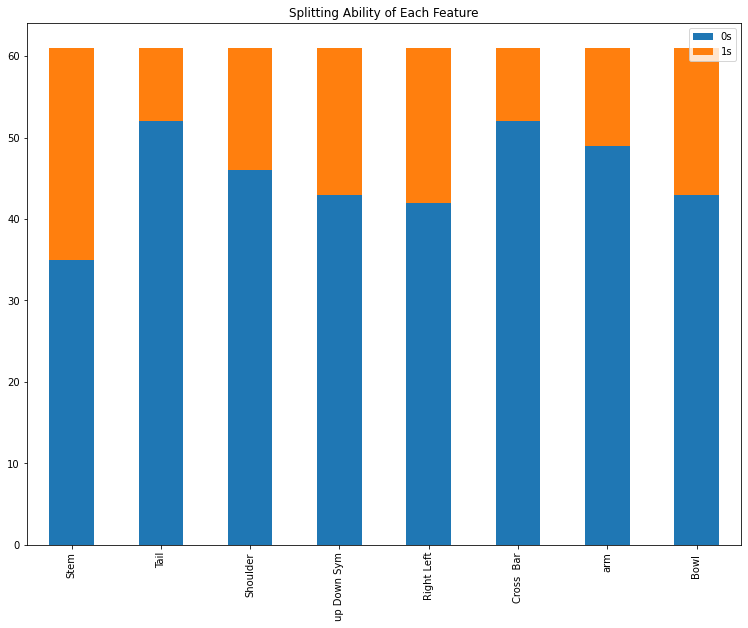

In [37]:
# Create the stacked bar chart
filterDF[['0s', '1s']].plot(kind='bar', stacked=True, color)

# Add a title to the chart
plt.title('Splitting Ability of Each Feature')

# Show the chart
plt.show()

In [59]:
ones

,Tail,Shoulder,up Down Sym,Right Left,Cross Bar,arm,Bowl
Stem,,,,,,,
0,6,7,13,14,4,5,13
1,3,8,5,5,5,7,5


In [64]:
ones = df.groupby('Stem').sum()
zeros = df.groupby('Stem').count() - ones
filterDFpostSplit = pd.concat([zeros, ones])
filterDFpostSplit.reset_index(inplace=True, drop=True)
filterDFpostSplit = filterDFpostSplit.transpose()
mapping={ filterDFpostSplit.columns[i]: new_name for i, new_name in enumerate(['0 -> 0', '1 -> 0', '0 -> 1', '1 -> 1']) }
filterDFpostSplit.rename(columns=mapping, inplace=True)
filterDFpostSplit

,0 -> 0,1 -> 0,0 -> 1,1 -> 1
Tail,29,23,6,3
Shoulder,28,18,7,8
up Down Sym,22,21,13,5
Right Left,21,21,14,5
Cross Bar,31,21,4,5
arm,30,19,5,7
Bowl,22,21,13,5


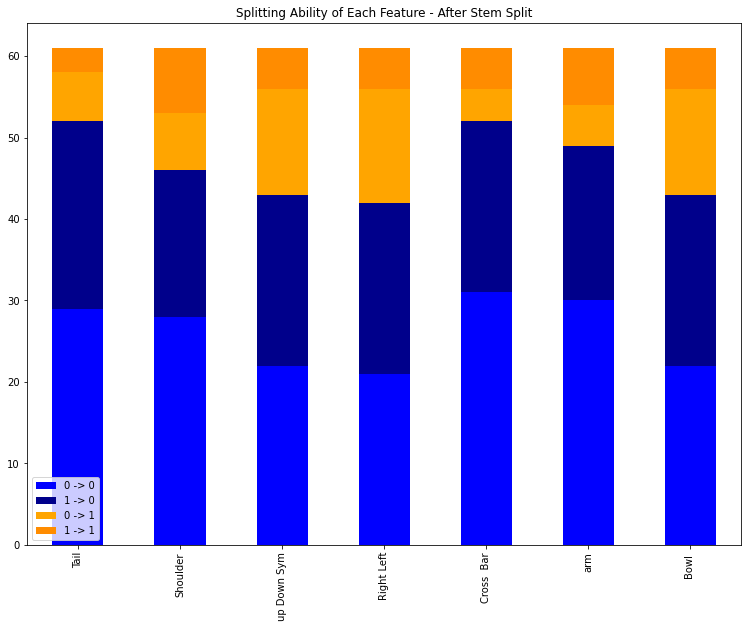

In [68]:
filterDFpostSplit.plot(kind='bar', stacked=True, color=['blue', 'darkblue', 'orange', 'darkorange'])
plt.title('Splitting Ability of Each Feature - After Stem Split')
plt.show()

Slide 3: Diversity: Hamming distance between each filter pair - how often does each pair agree.
for fun -- maybe Show two closest (least diverse) and two furthest apart (most diverse)

In [10]:
# Get the number of columns in the data frame
num_cols = df.shape[1]

# Initialize the distance matrix
distance_matrix = np.zeros((num_cols, num_cols))

# Loop through each pair of columns and compute the binary distance
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        distance = np.sum(df.iloc[:, i] != df.iloc[:, j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# Print the distance matrix
distance_matrix

array([[ 0., 29., 25., 34., 35., 25., 24., 34.],
       [29.,  0., 20., 25., 28., 18., 17., 15.],
       [25., 20.,  0., 31., 30., 16., 21., 23.],
       [34., 25., 31.,  0., 21., 23., 22., 24.],
       [35., 28., 30., 21.,  0., 20., 29., 31.],
       [25., 18., 16., 23., 20.,  0., 17., 25.],
       [24., 17., 21., 22., 29., 17.,  0., 26.],
       [34., 15., 23., 24., 31., 25., 26.,  0.]])

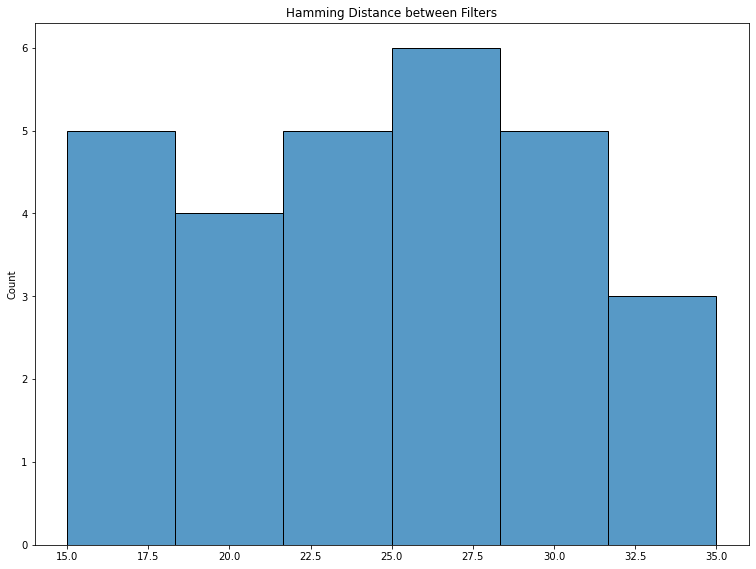

In [32]:
triangular_indices = np.triu_indices(distance_matrix.shape[0], k=1)
flat_upper_triangular = distance_matrix[triangular_indices]
ax = sns.histplot(flat_upper_triangular)
ax.set(title='Hamming Distance between Filters')
plt.show()

In [27]:
#Get the closest features
np.fill_diagonal(distance_matrix, np.inf)
print('Lowest Distance:', np.min(distance_matrix))
min_index = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
a, b = min_index
print(f'Closest Pair: ({df.columns[a]}, {df.columns[b]})') 

print('')

#Get the furthest features
np.fill_diagonal(distance_matrix, -1)
print('Furthest Distance:', np.max(distance_matrix))
max_index = np.unravel_index(np.argmax(distance_matrix), distance_matrix.shape)
c, d = max_index
print(f'Furthest Pair: ({df.columns[c]}, {df.columns[d]})') 

Lowest Distance: 15.0
Closest Pair: (Tail, Bowl )

Furthest Distance: 35.0
Furthest Pair: (Stem, Right Left)


/Users/suibhneofoighil/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


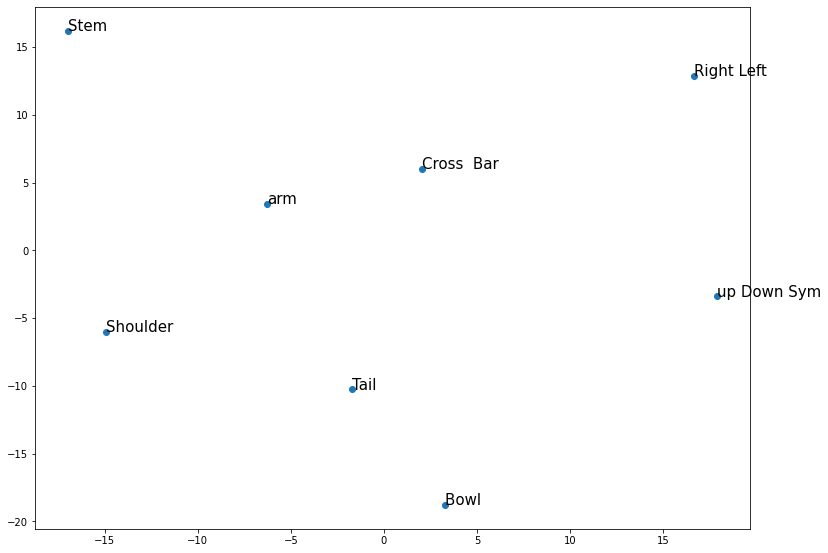

In [33]:
from sklearn.manifold import MDS

def visualize_distance_matrix(distance_matrix, labels=None):
    mds = MDS(n_components=2, dissimilarity='precomputed')
    mds_coordinates = mds.fit_transform(distance_matrix)
    x = mds_coordinates[:, 0]
    y = mds_coordinates[:, 1]
    plt.scatter(x, y)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (x[i], y[i]), fontsize=15)
    plt.show()
    
visualize_distance_matrix(distance_matrix, df.columns)

Slide 5: Assemblage: Take a pair - and then look at those that it distinguishes?